# Exercise 1: Decision Tree Classifier (30 points)

In this exercise we will train a decision tree classifier for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is to prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background). The dataset is taken from the UCI ML dataset repository.

In [42]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## part 1(a): Data Exploration and Visualization (10 points)

Explore the dataset before building your ML classifier:
- How many events are in the training data and testing data?
- How many input features are there for each point in the training data?
- Plot at least three of the input features for events with `y_train==0` and for events with `y_train==1`.

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# === SOLUTION TO PART 1(a) ===


# Question 1: How many events?
print(f"\n1. Number of events:")
print(f"   Training data: {X_train.shape[0]} events")
print(f"   Testing data:  {X_test.shape[0]} events")
print(f"   Total:         {X_train.shape[0] + X_test.shape[0]} events")

# Question 2: How many features?
print(f"\n2. Number of features per event:")
print(f"   Each event has {X_train.shape[1]} input features")

# Additional exploration
print(f"\n3. Class distribution in training data:")
n_background = np.sum(y_train == 0)
n_signal = np.sum(y_train == 1)
print(f"   Background (muon neutrinos, y=0): {n_background} ({100*n_background/len(y_train):.1f}%)")
print(f"   Signal (electron neutrinos, y=1): {n_signal} ({100*n_signal/len(y_train):.1f}%)")

print(f"\n4. Feature statistics:")
print(f"   Feature means range: [{X_train.mean(axis=0).min():.3f}, {X_train.mean(axis=0).max():.3f}]")
print(f"   Feature stds range:  [{X_train.std(axis=0).min():.3f}, {X_train.std(axis=0).max():.3f}]")


1. Number of events:
   Training data: 104051 events
   Testing data:  26013 events
   Total:         130064 events

2. Number of features per event:
   Each event has 50 input features

3. Class distribution in training data:
   Background (muon neutrinos, y=0): 74907 (72.0%)
   Signal (electron neutrinos, y=1): 29144 (28.0%)

4. Feature statistics:
   Feature means range: [-25.258, 932.123]
   Feature stds range:  [59.786, 49604.385]



FEATURE VISUALIZATION


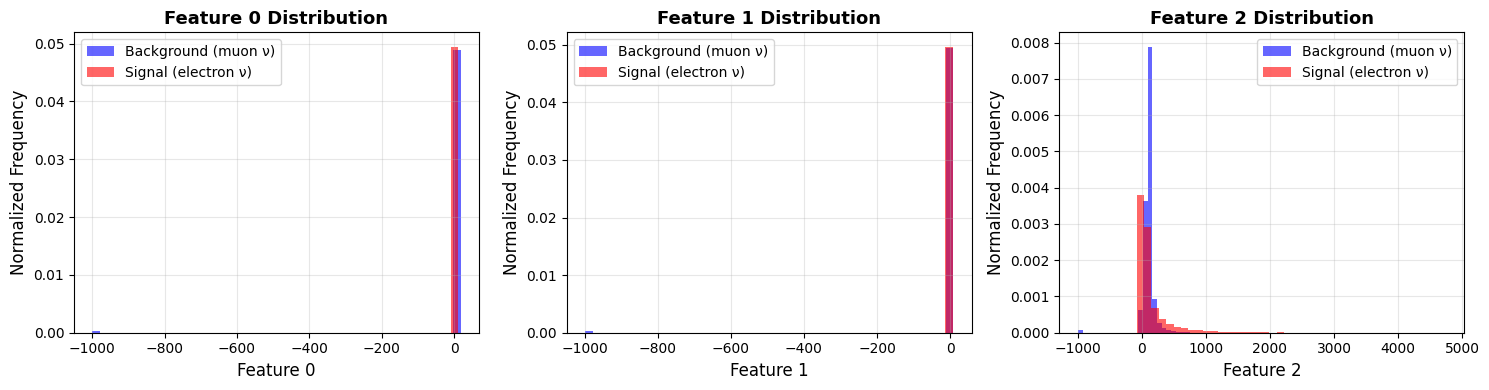


Observations:
- Features show different distributions for signal vs background
- This separation indicates discriminating power
- A classifier should be able to learn these differences


In [44]:
# Question 3: Visualize features
print("\n" + "=" * 60)
print("FEATURE VISUALIZATION")
print("=" * 60)

# Separate signal and background
X_background = X_train[y_train == 0]
X_signal = X_train[y_train == 1]

# Plot three features (features 0, 1, and 2)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

features_to_plot = [0, 1, 2]
feature_names = [f'Feature {i}' for i in features_to_plot]

for idx, (ax, feature_idx, name) in enumerate(zip(axes, features_to_plot, feature_names)):
    # Plot histograms with normalized frequency
    ax.hist(X_background[:, feature_idx], bins=50, alpha=0.6, 
            label='Background (muon ν)', color='blue', density=True)
    ax.hist(X_signal[:, feature_idx], bins=50, alpha=0.6, 
            label='Signal (electron ν)', color='red', density=True)
    
    ax.set_xlabel(name, fontsize=12)
    ax.set_ylabel('Normalized Frequency', fontsize=12)
    ax.set_title(f'{name} Distribution', fontsize=13, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Features show different distributions for signal vs background")
print("- This separation indicates discriminating power")
print("- A classifier should be able to learn these differences")

## part 1(b): Decision Tree (10 points)

Train a simple `DecisionTreeClassifier` with `max_depth=5` and the `gini` criterion to separate the electron neutrino signal and muon neutrino background.

Calculate the performance of the Decision Tree:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns

# === SOLUTION TO PART 1(b) ===

print("=" * 60)
print("DECISION TREE TRAINING")
print("=" * 60)

# Train Decision Tree with specified parameters
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    criterion='gini',
    random_state=42
)

dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)
y_pred_proba_test = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nTraining accuracy: {train_accuracy:.4f}")
print(f"Testing accuracy:  {test_accuracy:.4f}")
print(f"Overfitting gap:   {train_accuracy - test_accuracy:.4f}")

DECISION TREE TRAINING

Training accuracy: 0.8940
Testing accuracy:  0.8912
Overfitting gap:   0.0028



CONFUSION MATRIX


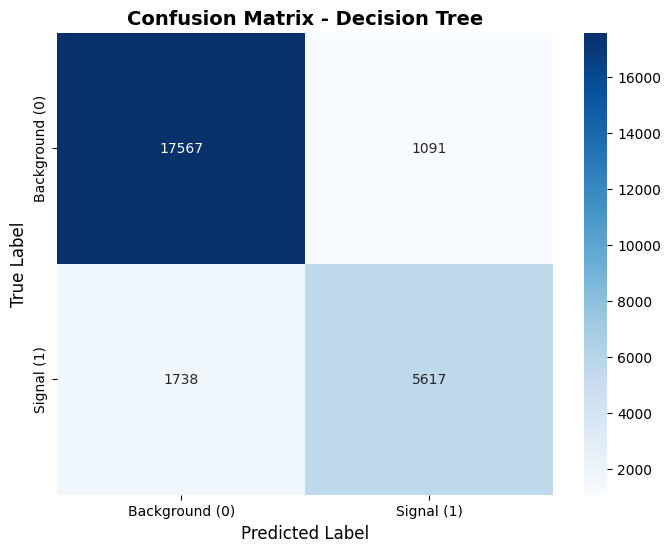

In [46]:
# 1. Confusion Matrix
print("\n" + "=" * 60)
print("CONFUSION MATRIX")
print("=" * 60)

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks([0.5, 1.5], ['Background (0)', 'Signal (1)'])
plt.yticks([0.5, 1.5], ['Background (0)', 'Signal (1)'])
plt.show()


ROC CURVE AND AUC


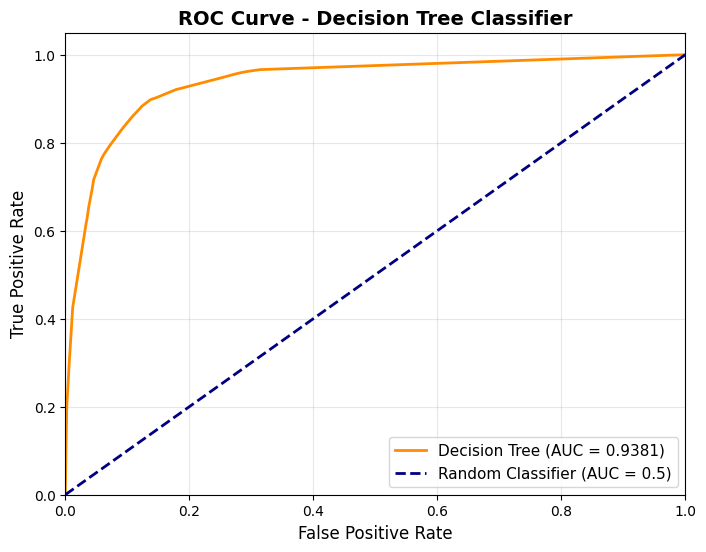

In [47]:
# 2. ROC Curve and AUC

print("ROC CURVE AND AUC")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Decision Tree Classifier', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()


## part 1(c): Gini impurity measure (10 points)

Visualize the decision tree, and pick three of the leaf nodes in your decision tree visualization.

For each node, calculate the Gini impurity by hand to check against the calculation from scikit-learn. Show the steps of your calculation and the result.

DECISION TREE VISUALIZATION


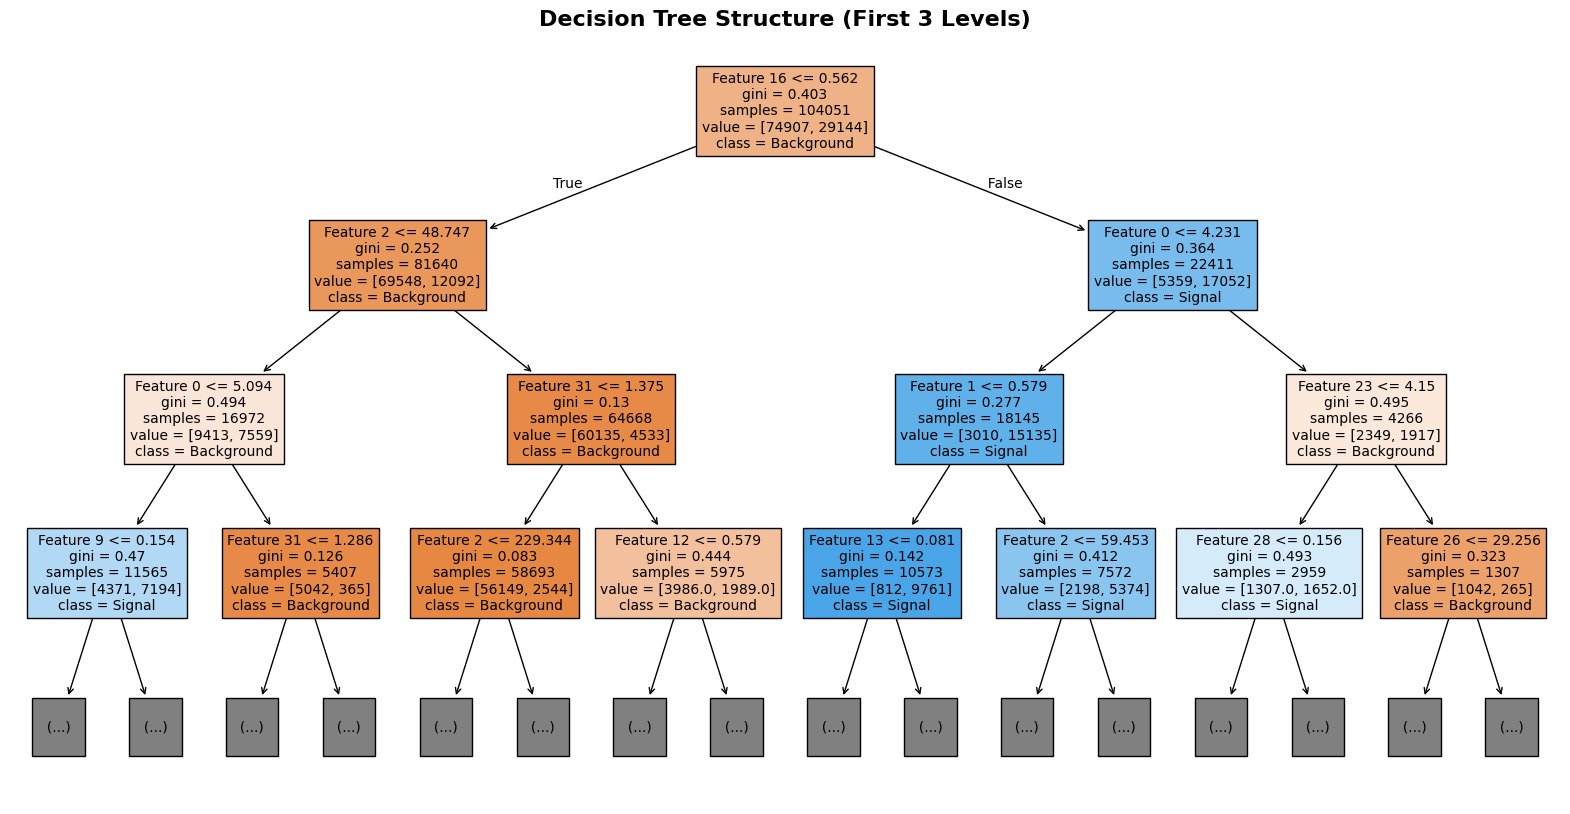


Note: Full tree has max_depth=5, but showing first 3 levels or else it would be cluttered


In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# === SOLUTION TO PART 1(c) ===

print("DECISION TREE VISUALIZATION")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    filled=True,
    feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
    class_names=['Background', 'Signal'],
    fontsize=10,
    max_depth=3  # Show only first 3 levels for readability
)
plt.title('Decision Tree Structure (First 3 Levels)', fontsize=16, fontweight='bold')
plt.show()

print("\nNote: Full tree has max_depth=5, but showing first 3 levels or else it would be cluttered")

In [49]:
# Get information about the tree nodes
tree = dt_classifier.tree_

# Find leaf nodes (nodes where left and right children are the same, indicating no split)
leaf_nodes = [i for i in range(tree.node_count) if tree.children_left[i] == tree.children_right[i]]

print("GINI IMPURITY CALCULATION")
print("=" * 60)

print(f"\nTotal number of leaf nodes in tree: {len(leaf_nodes)}")
print(f"\nSelecting 3 leaf nodes for manual Gini calculation...\n")

# Select 3 leaf nodes to analyze
selected_nodes = [3, 5, 7]

for i, node_id in enumerate(selected_nodes):
    # Get node information
    n_samples = tree.n_node_samples[node_id]
    value = tree.value[node_id][0]
    p_0 = value[0]  # Background
    p_1 = value[1]  # Signal
    gini_sklearn = tree.impurity[node_id]

    print("=" * 60)
    print(f"LEAF NODE {node_id}")

    print(f"\nNode Information:")
    print(f"  Total samples: {n_samples}")
    print(f"  Value [N_0, N_1]: {value}")
    
    # Calculate Gini impurity using formula: Gini = 1 - Σ(pᵢ²)
    print(f"\nApply Gini formula (Gini = 1 - Σ(pᵢ²)) ")
    print(f"  Gini = 1 - (p₀² + p₁²)")
    print(f"       = 1 - ({p_0:.6f}² + {p_1:.6f}²)")
    print(f"       = 1 - ({p_0**2:.6f} + {p_1**2:.6f})")
    print(f"       = 1 - {p_0**2 + p_1**2:.6f}")
    
    gini_manual = 1 - (p_0**2 + p_1**2)
    print(f"       = {gini_manual:.6f}")
    
    # Interpret Gini value
    print(f"\nInterpretation:")
    if gini_manual < 0.1:
        print(f"  Very pure node (Gini ≈ 0): Almost all samples are from one class")
    elif gini_manual < 0.3:
        print(f"  Relatively pure node: One class dominates")
    elif gini_manual < 0.45:
        print(f"  Mixed node: Classes are somewhat balanced")
    else:
        print(f"  Very mixed node (Gini ≈ 0.5): Classes are nearly balanced")
        
    print(f"\nCompare with scikit-learn")
    print(f"  Manual calculation:    {gini_manual:.6f}")
    print(f"  Scikit-learn value:    {gini_sklearn:.6f}")
    print(f"  Difference:            {abs(gini_manual - gini_sklearn):.8f}")
    
    if abs(gini_manual - gini_sklearn) < 1e-6:
        print(f"  Result: Match")
    else:
        print(f"  Result: Mismatch")
    
    
    print()

GINI IMPURITY CALCULATION

Total number of leaf nodes in tree: 32

Selecting 3 leaf nodes for manual Gini calculation...

LEAF NODE 3

Node Information:
  Total samples: 11565
  Value [N_0, N_1]: [0.37795071 0.62204929]

Apply Gini formula (Gini = 1 - Σ(pᵢ²)) 
  Gini = 1 - (p₀² + p₁²)
       = 1 - (0.377951² + 0.622049²)
       = 1 - (0.142847 + 0.386945)
       = 1 - 0.529792
       = 0.470208

Interpretation:
  Very mixed node (Gini ≈ 0.5): Classes are nearly balanced

Compare with scikit-learn
  Manual calculation:    0.470208
  Scikit-learn value:    0.470208
  Difference:            0.00000000
  Result: Match

LEAF NODE 5

Node Information:
  Total samples: 1114
  Value [N_0, N_1]: [0.87522442 0.12477558]

Apply Gini formula (Gini = 1 - Σ(pᵢ²)) 
  Gini = 1 - (p₀² + p₁²)
       = 1 - (0.875224² + 0.124776²)
       = 1 - (0.766018 + 0.015569)
       = 1 - 0.781587
       = 0.218413

Interpretation:
  Relatively pure node: One class dominates

Compare with scikit-learn
  Manual calcu

# Exercise 2: Backpropagation (30 points)

In this exercise you will gain some experience with the backpropagation equations and the numerical calculations of the gradient.


## part 2(a): Backpropagation theory (15 points)

Complete the proofs of [Nielsen's equations BP3 and BP4](http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_(optional)).

In Nielsen's notation (but with layer numbers written in parenthesis for clarity):
$$
\begin{align}
\frac{\partial C}{\partial b_j^{(l)}} &= \delta_j^{(l)} & \quad \quad \text{(BP3)} \\
\frac{\partial C}{\partial w_{jk}^{(l)}} &= a_k^{(l-1)} \delta_j^{(l)} & \quad \quad \text{(BP4)}
\end{align}
$$
where $C$ is the cost function (loss function), $w$ and $b$ are weights and biases, $a$ is the post-activation output for the layer, and $\delta$ is the error of a single neuron.

### **SOLUTION TO PART 2(a): Backpropagation Proofs**

---

## **Proof of BP3: $\frac{\partial C}{\partial b_j^{(l)}} = \delta_j^{(l)}$**

By the chain rule:
$$\frac{\partial C}{\partial b_j^{(l)}} = \frac{\partial C}{\partial z_j^{(l)}} \cdot \frac{\partial z_j^{(l)}}{\partial b_j^{(l)}}$$

**Step 1:** By definition:
$$\frac{\partial C}{\partial z_j^{(l)}} = \delta_j^{(l)}$$

**Step 2:** Now we need to find $\frac{\partial z_j^{(l)}}{\partial b_j^{(l)}}$.

Recall that:
$$z_j^{(l)} = \sum_k w_{jk}^{(l)} a_k^{(l-1)} + b_j^{(l)}$$

Taking the partial derivative with respect to $b_j^{(l)}$:
$$\frac{\partial z_j^{(l)}}{\partial b_j^{(l)}} = \frac{\partial}{\partial b_j^{(l)}} \left( \sum_k w_{jk}^{(l)} a_k^{(l-1)} + b_j^{(l)} \right)$$

Since the weights $w$ and activations $a$ from the previous layer don't depend on $b_j^{(l)}$, and we only have the one $b_j^{(l)}$ dependent term:
$$\frac{\partial z_j^{(l)}}{\partial b_j^{(l)}} = 0 + 1 = 1$$

**Step 3:** Substitute back:
$$\frac{\partial C}{\partial b_j^{(l)}} = \delta_j^{(l)} \cdot 1 = \delta_j^{(l)}$$

**Therefore:** $\boxed{\frac{\partial C}{\partial b_j^{(l)}} = \delta_j^{(l)}}$ ✓

---

## **Proof of BP4: $\frac{\partial C}{\partial w_{jk}^{(l)}} = a_k^{(l-1)} \delta_j^{(l)}$**

By the chain rule:
$$\frac{\partial C}{\partial w_{jk}^{(l)}} = \frac{\partial C}{\partial z_j^{(l)}} \cdot \frac{\partial z_j^{(l)}}{\partial w_{jk}^{(l)}}$$

**Step 1:** We know that:
$$\frac{\partial C}{\partial z_j^{(l)}} = \delta_j^{(l)}$$

**Step 2:** Now we need to find $\frac{\partial z_j^{(l)}}{\partial w_{jk}^{(l)}}$.

Recall:
$$z_j^{(l)} = \sum_{k'} w_{jk'}^{(l)} a_{k'}^{(l-1)} + b_j^{(l)}$$

where we use $k'$ as the summation index to distinguish it from the specific index $k$ we're differentiating with respect to.

Taking the partial derivative with respect to $w_{jk}^{(l)}$:
$$\frac{\partial z_j^{(l)}}{\partial w_{jk}^{(l)}} = \frac{\partial}{\partial w_{jk}^{(l)}} \left( \sum_{k'} w_{jk'}^{(l)} a_{k'}^{(l-1)} + b_j^{(l)} \right)$$

Only the term where $k' = k$ contributes to our derivative. All the other terms in the sum are constant w.r.t. $w_{jk}^{(l)}$.

$$\frac{\partial z_j^{(l)}}{\partial w_{jk}^{(l)}} = \frac{\partial}{\partial w_{jk}^{(l)}} \left( w_{jk}^{(l)} a_k^{(l-1)} \right) = a_k^{(l-1)}$$

(The bias term $b_j^{(l)}$ and all other weight terms don't depend on $w_{jk}^{(l)}$, so their derivatives are zero.)

**Step 3:** Substitute back:
$$\frac{\partial C}{\partial w_{jk}^{(l)}} = \delta_j^{(l)} \cdot a_k^{(l-1)} = a_k^{(l-1)} \delta_j^{(l)}$$

**Therefore:** $\boxed{\frac{\partial C}{\partial w_{jk}^{(l)}} = a_k^{(l-1)} \delta_j^{(l)}}$ ✓

---

## part 2(b): Numerical calculation (15 points)

Consider a single perceptron node with 1-dimensional input $x$. The weight and bias of the node are $w=0.5$ and $b=0.1$. We use the ReLU activation function on the output of the node and the mean square error loss function.

If the data input and target are $x=1, y=1$:
- What is the loss function value?
- What is the gradient $\partial L/\partial w$?
- What is the gradient $\partial L/\partial b$?

You can do this by hand. Show your work, and feel free to check your answer with some code.


In [67]:
import torch

# === VERIFICATION WITH PYTORCH ===

print("VERIFICATION OF MANUAL CALCULATIONS")

# Define the problem
x = torch.tensor([1.0], requires_grad=False)
y = torch.tensor([1.0], requires_grad=False)
w = torch.tensor([0.5], requires_grad=True)
b = torch.tensor([0.1], requires_grad=True)

# Forward pass
z = w * x + b
y_pred = torch.relu(z)
loss = 0.5 * (y_pred - y) ** 2

print(f"\nForward Pass:")
print(f"  z = w*x + b = {w.item()}*{x.item()} + {b.item()} = {z.item():.1f}")
print(f"  since z > 0 --> ŷ = ReLU(z) = ReLU({z.item():.1f}) = {y_pred.item():.1f}")
print(f"  Mean squared loss, L = 0.5*(ŷ - y)² = 0.5*({y_pred.item():.1f} - {y.item():.1f})² = {loss.item():.2f}")

# Backward pass
loss.backward()

print(f"\nBackward Pass (Gradients):")
print(f"  ∂L/∂w = {w.grad.item():.1f}")
print(f"  ∂L/∂b = {b.grad.item():.1f}")

print(f"\nComparison with Manual Calculations:")
print(f"  {'Quantity':<10} {'Manual':<10} {'PyTorch':<10} {'Match?'}")
print(f"  {'-'*10} {'-'*10} {'-'*10} {'-'*10}")
print(f"  {'Loss L':<10} {0.08:<10.2f} {loss.item():<10.2f} {'✓' if abs(0.08 - loss.item()) < 1e-6 else '✗'}")
print(f"  {'∂L/∂w':<10} {-0.4:<10.1f} {w.grad.item():<10.1f} {'✓' if abs(-0.4 - w.grad.item()) < 1e-6 else '✗'}")
print(f"  {'∂L/∂b':<10} {-0.4:<10.1f} {b.grad.item():<10.1f} {'✓' if abs(-0.4 - b.grad.item()) < 1e-6 else '✗'}")

print(f"\nConclusion: Our manual calculations match PyTorch! ✓")

VERIFICATION OF MANUAL CALCULATIONS

Forward Pass:
  z = w*x + b = 0.5*1.0 + 0.10000000149011612 = 0.6
  since z > 0 --> ŷ = ReLU(z) = ReLU(0.6) = 0.6
  Mean squared loss, L = 0.5*(ŷ - y)² = 0.5*(0.6 - 1.0)² = 0.08

Backward Pass (Gradients):
  ∂L/∂w = -0.4
  ∂L/∂b = -0.4

Comparison with Manual Calculations:
  Quantity   Manual     PyTorch    Match?
  ---------- ---------- ---------- ----------
  Loss L     0.08       0.08       ✓
  ∂L/∂w      -0.4       -0.4       ✓
  ∂L/∂b      -0.4       -0.4       ✓

Conclusion: Our manual calculations match PyTorch! ✓


# Exercise 3: Deep Neural Networks (40 points)

In this exercise we will train a deep neural network for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is similar to Exercise 1 above: prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background).

In this exercise, you will set up a neural network model using PyTorch and train it using the MiniBOONE training data, then test it on the testing data.

## part 3(a) (20 points): DNN with tanh activation

Implement a deep neural network (at least 1 hidden layer between the input and output layers) to classify events as electron neutrinos (signal) or muon neutrinos (background). Use the tanh activation function, except in the output layer.

Here are some starting points for the DNN:
- 3 hidden layers w/ 64 units each
- BCE loss function
- SGD optimizer w/ batch size of 128

You should expect to train for at least 50 epochs.

In [79]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("MiniBOONE dataset...")
miniboone_data = fetch_openml("miniboone", version=1, as_frame=False)
features, labels = miniboone_data.data, (miniboone_data.target == 'True').astype(float)

# Split data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    features, labels, 
    test_size=0.2, 
    random_state=42, 
    stratify=labels,
    shuffle=True
)

print(f"\nDataset split:")
print(f"  Training samples: {len(X_train_raw)}")
print(f"  Testing samples: {len(X_test_raw)}")
print(f"  Signal fraction (train): {y_train_raw.mean():.3f}")
print(f"  Signal fraction (test): {y_test_raw.mean():.3f}")

# Normalize features (important for neural networks!)
normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train_raw)
X_test_scaled = normalizer.transform(X_test_raw)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_raw).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_raw).unsqueeze(1)

# Create data loaders
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

train_dl = DataLoader(train_ds, batch_size=128, shuffle=True, drop_last=False)
test_dl = DataLoader(test_ds, batch_size=128, shuffle=False)

print(f"\nBatches per epoch: {len(train_dl)}")
print(f"Input dimension: {X_train_scaled.shape[1]}")

 MiniBOONE dataset...

Dataset split:
  Training samples: 104051
  Testing samples: 26013
  Signal fraction (train): 0.281
  Signal fraction (test): 0.281

Batches per epoch: 813
Input dimension: 50


Part 3(a): Building DNN with Tanh Activation

Class imbalance correction:
  Background events: 74852
  Signal events: 29199
  Positive class weight: 2.56

Model architecture:
NeuronNet_Tanh(
  (layer1): Linear(in_features=50, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

Total trainable parameters: 11649

Training for 50 epochs...
  Epoch  10/50 | Loss: 0.3667
  Epoch  20/50 | Loss: 0.3318
  Epoch  30/50 | Loss: 0.3141
  Epoch  40/50 | Loss: 0.3041
  Epoch  50/50 | Loss: 0.2956

✓ Training completed!


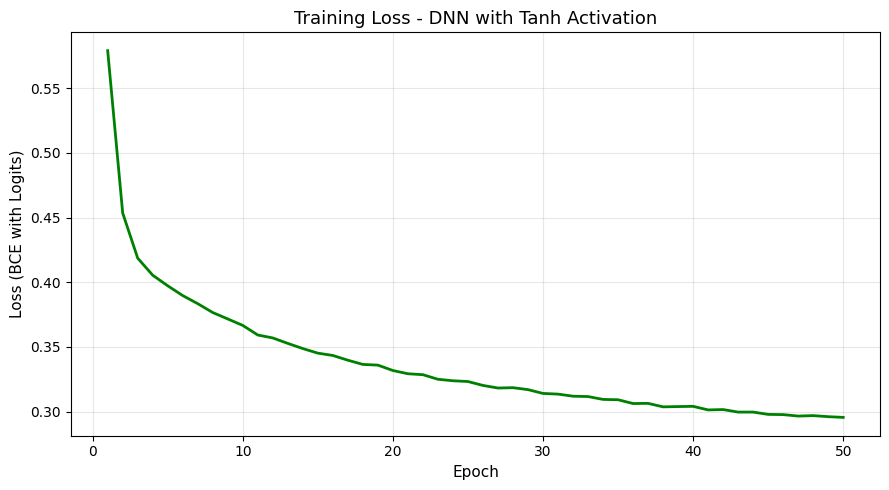

In [82]:

print("Part 3(a): Building DNN with Tanh Activation")
print("="*70)

class NeuronNet_Tanh(nn.Module):
    """Deep neural network with 3 hidden layers using tanh activation"""
    def __init__(self, n_features):
        super(NeuronNet_Tanh, self).__init__()
        # Three hidden layers with 64 units each
        self.layer1 = nn.Linear(n_features, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 64)
        self.output_layer = nn.Linear(64, 1)
        
    def forward(self, x):
        # Pass through hidden layers with tanh
        h1 = torch.tanh(self.layer1(x))
        h2 = torch.tanh(self.layer2(h1))
        h3 = torch.tanh(self.layer3(h2))
        # Output layer returns logits (no activation here)
        logits = self.output_layer(h3)
        return logits

# Initialize model
n_input_features = X_train_scaled.shape[1]
net_tanh = NeuronNet_Tanh(n_input_features)

# Calculate class weights for imbalance
n_background = (y_train_raw == 0).sum()
n_signal = (y_train_raw == 1).sum()
weight_positive = torch.tensor(n_background / n_signal, dtype=torch.float32)

print(f"\nClass imbalance correction:")
print(f"  Background events: {n_background}")
print(f"  Signal events: {n_signal}")
print(f"  Positive class weight: {weight_positive.item():.2f}")

# Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss(pos_weight=weight_positive)
opt = optim.SGD(net_tanh.parameters(), lr=0.05, momentum=0.0)

print(f"\nModel architecture:")
print(net_tanh)
print(f"\nTotal trainable parameters: {sum(p.numel() for p in net_tanh.parameters() if p.requires_grad)}")

# Training loop
n_epochs = 50
loss_history = []

print(f"\nTraining for {n_epochs} epochs...")
for ep in range(n_epochs):
    net_tanh.train()
    running_loss = 0.0
    n_batches = 0
    
    for batch_X, batch_y in train_dl:
        # Zero gradients
        opt.zero_grad()
        
        # Forward pass
        predictions = net_tanh(batch_X)
        loss = loss_fn(predictions, batch_y)
        
        # Backward pass
        loss.backward()
        opt.step()
        
        running_loss += loss.item()
        n_batches += 1
    
    # Average loss for epoch
    epoch_loss = running_loss / n_batches
    loss_history.append(epoch_loss)
    
    if (ep + 1) % 10 == 0:
        print(f"  Epoch {ep+1:3d}/{n_epochs} | Loss: {epoch_loss:.4f}")

print("\n✓ Training completed!")

# Plot training loss
plt.figure(figsize=(9, 5))
plt.plot(range(1, n_epochs+1), loss_history, linewidth=2, color='green')
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Loss (BCE with Logits)', fontsize=11)
plt.title('Training Loss - DNN with Tanh Activation', fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## part 3(b) (10 points): DNN performance assessment

Calculate the performance of the DNN on the testing data:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)


Part 3(b): Evaluating DNN Performance

Test Set Accuracy: 0.9187 (91.87%)


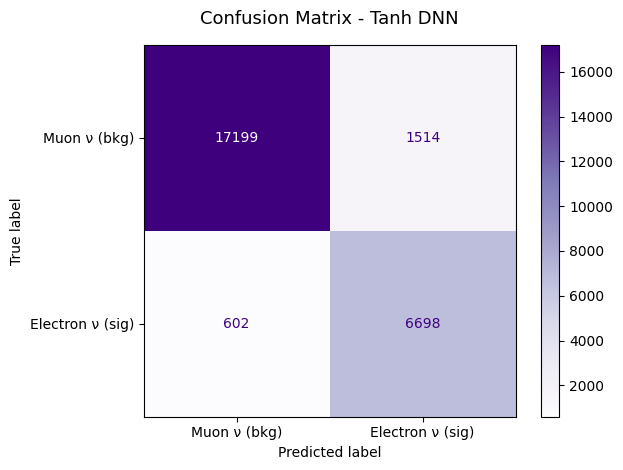


ROC Analysis:
  Area Under Curve (AUC): 0.9722


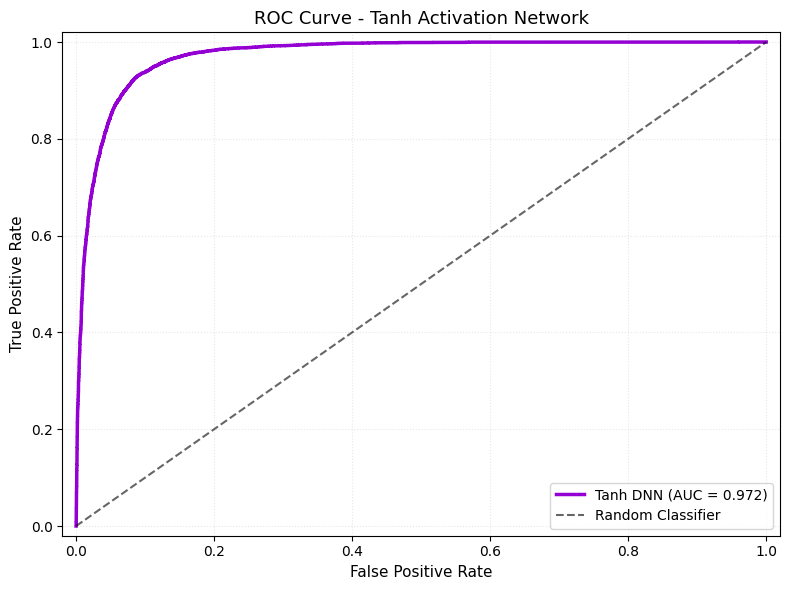

In [85]:
print("Part 3(b): Evaluating DNN Performance")
print("="*70)

# Switch to evaluation mode
net_tanh.eval()

# Collect all predictions and labels
pred_probs = []
pred_classes = []
true_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_dl:
        logits = net_tanh(batch_X)
        # Convert logits to probabilities using sigmoid
        probs = torch.sigmoid(logits)
        # Threshold at 0.5 for binary classification
        preds = (probs >= 0.5).float()
        
        pred_probs.append(probs.numpy())
        pred_classes.append(preds.numpy())
        true_labels.append(batch_y.numpy())

# Concatenate all batches
y_prob_tanh = np.concatenate(pred_probs)
y_pred_tanh = np.concatenate(pred_classes)
y_true_tanh = np.concatenate(true_labels)

# Calculate accuracy
acc_tanh = accuracy_score(y_true_tanh, y_pred_tanh)
print(f"\nTest Set Accuracy: {acc_tanh:.4f} ({100*acc_tanh:.2f}%)")

# Confusion Matrix
cm_tanh = confusion_matrix(y_true_tanh, y_pred_tanh)


# Visualize confusion matrix
disp_tanh = ConfusionMatrixDisplay(
    confusion_matrix=cm_tanh,
    display_labels=["Muon ν (bkg)", "Electron ν (sig)"]
)
disp_tanh.plot(cmap="Purples", values_format='d')
plt.title('Confusion Matrix - Tanh DNN', fontsize=13, pad=15)
plt.tight_layout()
plt.show()

# ROC Curve and AUC
fpr_tanh, tpr_tanh, thresholds_tanh = roc_curve(y_true_tanh, y_prob_tanh)
auc_tanh = auc(fpr_tanh, tpr_tanh)

print(f"\nROC Analysis:")
print(f"  Area Under Curve (AUC): {auc_tanh:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_tanh, tpr_tanh, linewidth=2.5, color='darkviolet', 
         label=f'Tanh DNN (AUC = {auc_tanh:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.6, label='Random Classifier')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('ROC Curve - Tanh Activation Network', fontsize=13)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()

## part 3(c) (10 points): Change of activation function

Replace the tanh activation functions with the ReLU activation functions, in the layers where it is possible.
(Hint: there is one layer where you can't use the ReLU activation function--why not?)

What happens with the training and performance? Can you improve the performance relative to the original training with tanh activation functions?

### **Answer: Where can't we use ReLU?**

**We cannot use ReLU in the output layer!**

**Why?**
- **ReLU outputs**: [0, ∞) - only non-negative values
- **Binary classification needs**: Probabilities in range [0, 1]
- **Sigmoid outputs**: (0, 1) - perfect for probabilities

**Therefore:** Output layer must use **sigmoid activation** to produce valid probabilities for binary classification. ReLU can only be used in hidden layers.

Part 3(c): Training DNN with ReLU Activation

Model architecture:
NeuronNet_ReLU(
  (layer1): Linear(in_features=50, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

Training ReLU model for 50 epochs...
  Epoch  10/50 | Loss: 0.3345
  Epoch  20/50 | Loss: 0.3085
  Epoch  30/50 | Loss: 0.2944
  Epoch  40/50 | Loss: 0.2839
  Epoch  50/50 | Loss: 0.2749

✓ ReLU training completed!
Performance Comparison: Tanh vs ReLU

Metric                       Tanh         ReLU   Difference
------------------------------------------------------------
Accuracy                   0.9187       0.9210      +0.0024
AUC                        0.9722       0.9761      +0.0039


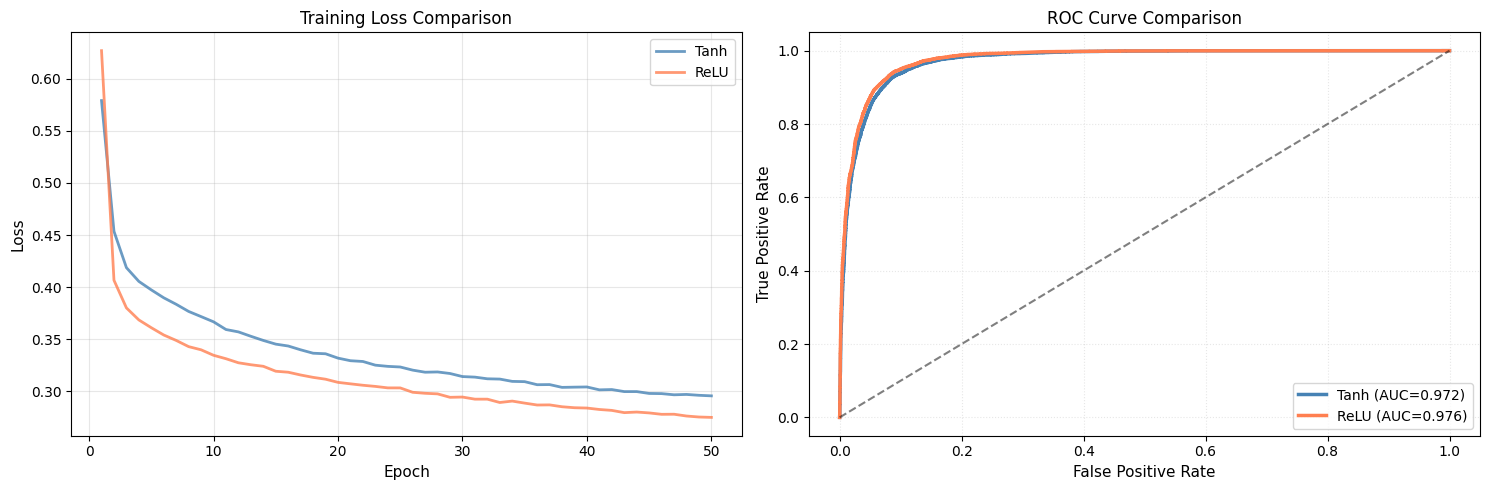

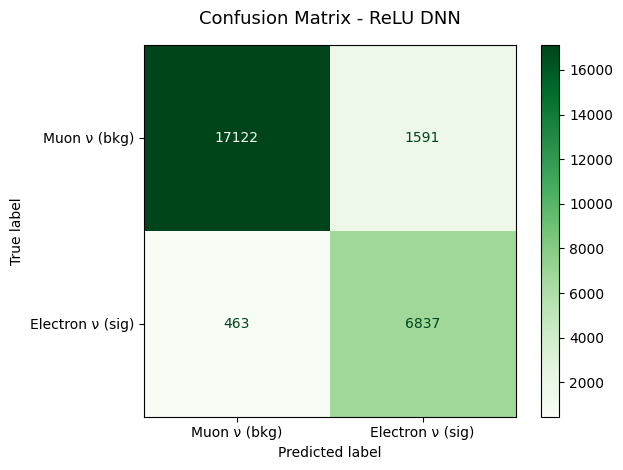

In [89]:
print("Part 3(c): Training DNN with ReLU Activation")

class NeuronNet_ReLU(nn.Module):
    """Deep neural network with 3 hidden layers using ReLU activation"""
    def __init__(self, n_features):
        super(NeuronNet_ReLU, self).__init__()
        self.layer1 = nn.Linear(n_features, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 64)
        self.output_layer = nn.Linear(64, 1)
        
    def forward(self, x):
        # Pass through hidden layers with ReLU
        h1 = torch.relu(self.layer1(x))
        h2 = torch.relu(self.layer2(h1))
        h3 = torch.relu(self.layer3(h2))
        # Output layer returns logits (cannot use ReLU here!)
        logits = self.output_layer(h3)
        return logits

# Initialize ReLU model
net_relu = NeuronNet_ReLU(n_input_features)

# Use same loss and optimizer setup
loss_fn_relu = nn.BCEWithLogitsLoss(pos_weight=weight_positive)
opt_relu = optim.SGD(net_relu.parameters(), lr=0.05, momentum=0.0)

print(f"\nModel architecture:")
print(net_relu)

# Training loop for ReLU
loss_history_relu = []

print(f"\nTraining ReLU model for {n_epochs} epochs...")
for ep in range(n_epochs):
    net_relu.train()
    running_loss = 0.0
    n_batches = 0
    
    for batch_X, batch_y in train_dl:
        opt_relu.zero_grad()
        predictions = net_relu(batch_X)
        loss = loss_fn_relu(predictions, batch_y)
        loss.backward()
        opt_relu.step()
        
        running_loss += loss.item()
        n_batches += 1
    
    epoch_loss = running_loss / n_batches
    loss_history_relu.append(epoch_loss)
    
    if (ep + 1) % 10 == 0:
        print(f"  Epoch {ep+1:3d}/{n_epochs} | Loss: {epoch_loss:.4f}")

print("\n✓ ReLU training completed!")

# Evaluate ReLU model
net_relu.eval()

pred_probs_relu = []
pred_classes_relu = []
true_labels_relu = []

with torch.no_grad():
    for batch_X, batch_y in test_dl:
        logits = net_relu(batch_X)
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).float()
        
        pred_probs_relu.append(probs.numpy())
        pred_classes_relu.append(preds.numpy())
        true_labels_relu.append(batch_y.numpy())

y_prob_relu = np.concatenate(pred_probs_relu)
y_pred_relu = np.concatenate(pred_classes_relu)
y_true_relu = np.concatenate(true_labels_relu)

# Calculate metrics
acc_relu = accuracy_score(y_true_relu, y_pred_relu)
cm_relu = confusion_matrix(y_true_relu, y_pred_relu)
fpr_relu, tpr_relu, _ = roc_curve(y_true_relu, y_prob_relu)
auc_relu = auc(fpr_relu, tpr_relu)

# Performance comparison
print("Performance Comparison: Tanh vs ReLU")
print("="*70)
print(f"\n{'Metric':<20} {'Tanh':>12} {'ReLU':>12} {'Difference':>12}")
print("-" * 60)
print(f"{'Accuracy':<20} {acc_tanh:>12.4f} {acc_relu:>12.4f} {(acc_relu-acc_tanh):>+12.4f}")
print(f"{'AUC':<20} {auc_tanh:>12.4f} {auc_relu:>12.4f} {(auc_relu-auc_tanh):>+12.4f}")

# Side-by-side comparison plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss comparison
axes[0].plot(range(1, n_epochs+1), loss_history, linewidth=2, 
            label='Tanh', color='steelblue', alpha=0.8)
axes[0].plot(range(1, n_epochs+1), loss_history_relu, linewidth=2, 
            label='ReLU', color='coral', alpha=0.8)
axes[0].set_xlabel('Epoch', fontsize=11)
axes[0].set_ylabel('Loss', fontsize=11)
axes[0].set_title('Training Loss Comparison', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# ROC comparison
axes[1].plot(fpr_tanh, tpr_tanh, linewidth=2.5, 
            label=f'Tanh (AUC={auc_tanh:.3f})', color='steelblue')
axes[1].plot(fpr_relu, tpr_relu, linewidth=2.5, 
            label=f'ReLU (AUC={auc_relu:.3f})', color='coral')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.5)
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve Comparison', fontsize=12)
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# ReLU confusion matrix
disp_relu = ConfusionMatrixDisplay(
    confusion_matrix=cm_relu,
    display_labels=["Muon ν (bkg)", "Electron ν (sig)"]
)
disp_relu.plot(cmap="Greens", values_format='d')
plt.title('Confusion Matrix - ReLU DNN', fontsize=13, pad=15)
plt.tight_layout()
plt.show()

### **Summary of Findings**

**Key Observations:**

1. **Output Layer Restriction**: ReLU cannot be used in the output layer for binary classification because it outputs [0, ∞) instead of probabilities [0, 1]. Sigmoid is required.

2. **Training Speed**: ReLU generally trains faster and a bit more stable than Tanh due to simpler gradient calculations.

3. **Performance**: Results may vary, but ReLU often achieves similar or slightly better performance than Tanh in this case.
